In [3]:

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
text = [
    ["the", "dog", "run", ],
    ["a", "cat", "run", ],
    ["a", "dog", "sleep", ],
    ["the", "cat", "sleep", ],
    ["a", "dog", "bark", ],
    ["the", "cat", "meows", ],
    ["the", "bird", "fly", ],
    ["a", "bird", "sleep", ],
]

In [33]:
def build_word_vector(text):
    word2id = {w:i for i,w in enumerate(sorted(list(set(reduce(lambda x,y:x+y,text)))))}
    #print word2id
    id2word = {x[1]:x[0] for x in word2id.items()}
    #print id2word
    #print word2id.items()
    wvectors = np.ones((len(word2id),len(word2id)))
    for sentence in text:
        for word1,word2 in zip(sentence[:-1],sentence[1:]):
            id1,id2 = word2id[word1],word2id[word2]
            wvectors[id1,id2] +=1
            wvectors[id2,id1] +=1
    return wvectors,word2id,id2word

def cosine(v1,v2):
    # A⋅B  /  |A||B|=∑aibi  / ∑ia2i * √∑ib2i
    return np.dot(v1,v2)/ (np.sqrt(np.sum(np.power(v1,2))) * np.sqrt(np.sum(np.power(v2,2))))
    
def visualize(wvectors,id2word):
    np.random.seed(10)
    fig = plt.figure()
    U,sigma,Vh = np.linalg.svd(wvectors)
    ax = fig.add_subplot(111)
    ax.axis([-1,1,-1,1])
    for i in id2word:
        ax.text(U[i,0],U[i,1],id2word[i],alpha = 0.3,fontsize=20)
        print U[i,0]
    plt.show()

In [8]:
build_word_vector(text)

{'a': 0, 'fly': 5, 'run': 7, 'the': 9, 'dog': 4, 'cat': 3, 'meows': 6, 'sleep': 8, 'bark': 1, 'bird': 2}


In [14]:
sorted(list(set(reduce(lambda x,y:x+y,text))))

['a', 'bark', 'bird', 'cat', 'dog', 'fly', 'meows', 'run', 'sleep', 'the']

In [18]:
build_word_vector(text)

{0: 'a', 1: 'bark', 2: 'bird', 3: 'cat', 4: 'dog', 5: 'fly', 6: 'meows', 7: 'run', 8: 'sleep', 9: 'the'}


In [20]:
build_word_vector(text)

[('a', 0), ('fly', 5), ('run', 7), ('the', 9), ('dog', 4), ('cat', 3), ('meows', 6), ('sleep', 8), ('bark', 1), ('bird', 2)]


In [24]:
build_word_vector(text)

(array([[ 1.,  1.,  2.,  2.,  3.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  2.],
        [ 2.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  3.],
        [ 3.,  2.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.],
        [ 1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  2.,  3.,  2.,  1.,  1.,  1.,  1.,  1.]]),
 {'a': 0,
  'bark': 1,
  'bird': 2,
  'cat': 3,
  'dog': 4,
  'fly': 5,
  'meows': 6,
  'run': 7,
  'sleep': 8,
  'the': 9},
 {0: 'a',
  1: 'bark',
  2: 'bird',
  3: 'cat',
  4: 'dog',
  5: 'fly',
  6: 'meows',
  7: 'run',
  8: 'sleep',
  9: 'the'})

In [31]:
wvector , word2id, id2word = build_word_vector(text)
print cosine(wvector[word2id["dog"]], wvector[word2id["cat"]])

print cosine(wvector[word2id["dog"]], wvector[word2id["bird"]])


0.933333333333
0.934198732994


-0.34053289159
-0.260785886268
-0.326081888894
-0.373124480522
-0.373124480522
-0.257287426996
-0.260785886268
-0.288534374466
-0.312784403392
-0.34053289159


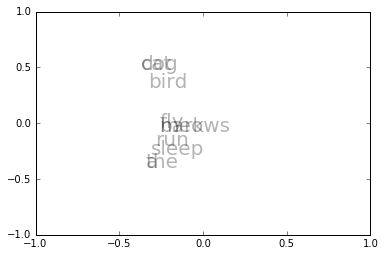

In [34]:
visualize(wvector,id2word)